In [ ]:
#### Eugenio Perez Molphe Montoya ####
#### 17.06.2024 ####
#### Create graphs to explore what happened ####
'''
1. An histogram with the percentage idenntity of the alignments
'''

In [1]:
### Libraries ###
import sys
import matplotlib.pyplot as plt
import os

In [5]:
# Get the percentage identity of the alignments
pathDir = '/mnt/mnemo5/eugenio/IroN_project/Files/03_IroN_BLAST_results'
blastFiles = os.listdir(pathDir)

# Create a list with the percentage identity of the alignments
percentageIdentity = []
for blastFile in blastFiles:
    evaluePI = {}
    with open(pathDir + '/' + blastFile, 'r') as file:
        for line in file:
            if line.startswith('#'):
                continue
            else:
                line = line.split('\t')
                evaluePI[float(line[10])] = float(line[2])
    if evaluePI:
        percentageIdentity.append(evaluePI[max(evaluePI.keys())])

print(percentageIdentity)            

[80.547, 82.09, 80.851, 80.851, 80.851, 80.851, 76.797, 82.09, 80.851, 80.851, 72.617, 80.851, 80.851, 82.09, 82.09, 82.09, 80.851, 77.097, 82.09, 80.547, 80.851, 82.09, 72.435, 80.851, 80.851, 80.851, 80.851, 80.851, 71.371, 80.851, 80.851, 80.851, 80.851, 76.011, 80.851, 80.851, 80.851, 80.851, 80.851, 80.851, 80.851, 80.851, 80.851, 80.851, 80.851, 80.547, 80.851, 73.418, 80.547, 73.386, 80.851, 80.851, 80.851, 80.851, 80.851, 80.851, 82.09, 80.851, 80.851, 80.851, 80.851, 80.851, 80.851, 80.851, 80.851, 82.09, 80.851, 80.851, 80.851, 80.851, 80.851, 80.851, 84.783, 81.155, 80.851, 80.851, 80.851, 80.851, 80.488, 80.851, 82.09, 80.851, 80.851, 82.09, 80.851, 80.851, 80.851, 80.851, 80.547, 80.851, 80.851, 80.851, 82.09, 80.851, 76.471, 80.851, 80.488, 80.851, 80.851, 80.851, 73.077, 80.851, 75.817, 82.09, 80.851, 80.851, 80.851, 80.851, 80.851, 82.09, 80.851, 80.851, 72.072, 82.09, 80.851, 80.851, 80.851, 80.851, 85.0, 80.851, 82.09, 80.851, 80.851, 80.851, 82.09, 82.09, 80.851, 82.

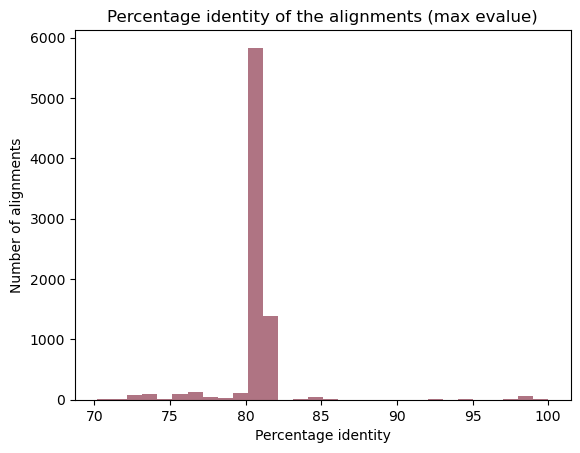

In [10]:
# Make the histogram
plt.hist(percentageIdentity, bins=30, color='#8E394E', alpha=0.7)
plt.xlabel('Percentage identity')
plt.ylabel('Number of alignments')
plt.title('Percentage identity of the alignments (max evalue)')
plt.show()

In [7]:
print(min(percentageIdentity))
print(max(percentageIdentity))

70.19
100.0


In [13]:
import statistics

mode_value = statistics.mean(percentageIdentity)
print(mode_value)

80.88280538586211
